In [1]:
# import the necessary packages that will be utilized
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import pathlib
import seaborn as sns

# assign the desired file a variable using pathlib.Path command
input_file = pathlib.Path("../0.data-download/data/sample_info.csv")

# set the data frame to be the desired .csv file that is read by pandas(pd) using the pd.read_csv(desired file read as a previously defined variable)
df = pd.read_csv(input_file)

# print the parameters of the read file
print(df.shape)

(1840, 29)


In [2]:
# how many samples?
n_samples = len(df["DepMap_ID"])
print(f"Number of Samples: {n_samples} \n")

# how many genes 
all_cancers = df["age"].unique()
print(f"Ages sampled from: \n {all_cancers} \n")

# how many different types of cancer?
all_cancers = df["primary_disease"].unique()
print(f"All Cancer Types: \n {all_cancers} \n")

Number of Samples: 1840 

Ages sampled from: 
 [nan '11' '55' '48' '1' '61' '16' '35' '50' '29' '77' '36' '5' '74' '26'
 'Adult' '20' '52' '19' '64' '60' '6' '42' '10' '58' '66' '68' '9' '71'
 '27' '7' '72' '69' '44' '59' '56' '22' '46' '73' '57' '3' '63' '31' '78'
 '53' '62' '0' '28' '54' '75' '67' '15' '49' '84' '37' '40' '70' '41' '47'
 '30' '43' '21' '45' '65' 'Pediatric' '2' 'Fetus' '14' '76' '51' '23' '82'
 '38' '12' '79' '80' '25' '17' '34' '86' '39' '81' '4' '18' '13' '33' '24'
 '88' '8' '32' '85' '94' '83' '89' '87'] 

All Cancer Types: 
 ['Kidney Cancer' 'Leukemia' 'Lung Cancer' 'Non-Cancerous' 'Sarcoma'
 'Lymphoma' 'Colon/Colorectal Cancer' 'Pancreatic Cancer' 'Gastric Cancer'
 'Rhabdoid' 'Endometrial/Uterine Cancer' 'Esophageal Cancer'
 'Breast Cancer' 'Brain Cancer' 'Ovarian Cancer' 'Bone Cancer' 'Myeloma'
 'Head and Neck Cancer' 'Bladder Cancer' 'Skin Cancer' 'Bile Duct Cancer'
 'Prostate Cancer' 'Cervical Cancer' 'Thyroid Cancer' 'Neuroblastoma'
 'Eye Cancer' 'Liposarcom

In [3]:
# "Adult" was set to 18
# "Pediatric" was set to 0
# "Fetus" was set to 0

# create a new data frame that excludes blank cells in the data sets "Age" column
no_nan_age_df = df.loc[df["age"].notnull()]

# create a new data frame that will also assign the integer value of 18 to cells containing "Adult"
no_nan_age_df.loc[(df["age"] == "Adult")] = 18

# create a new data frame that will also assign the integer value of 0 to cells containing "Pediatric"
no_nan_age_df.loc[(df["age"] == "Pediatric")] = 0

# create a new data frame that will also assign the integer value of 0 to cells containg "Fetus"
no_nan_age_df.loc[(df["age"] == "Fetus")] = -1



adult_df = no_nan_age_df.loc[no_nan_age_df["age"].astype(int) >= 18]
adult_df = adult_df.astype({"age": int})
pediatric_df = no_nan_age_df.loc[(no_nan_age_df["age"].astype(int) < 18) & (no_nan_age_df["age"].astype(int) != -1)]
pediatric_df = pediatric_df.astype({"age": int})


<AxesSubplot:xlabel='age', ylabel='Count'>

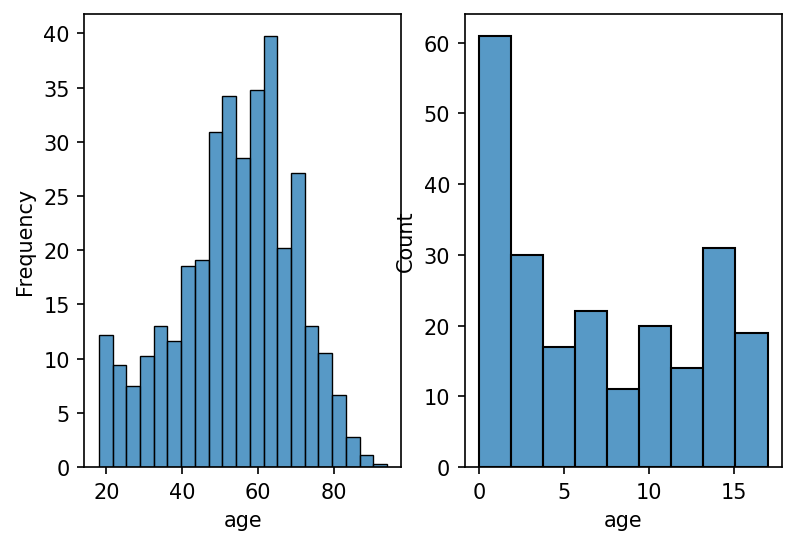

In [4]:

ig, axs = plt.subplots(1, 2, dpi=150)

# plot adult age distribution 
sns.histplot(x="age", data=adult_df, stat="frequency", ax=axs[0])

# plot pediatric age distribution
sns.histplot(x="age", data=pediatric_df, stat="count", ax=axs[1])

# visualizes the general distribution of ages sampled from

In [5]:
pediatric_df.loc[pediatric_df["age"] == 1]

,DepMap_ID,cell_line_name,stripped_cell_line_name,CCLE_Name,alias,COSMICID,sex,source,RRID,WTSI_Master_Cell_ID,...,lineage_sub_subtype,lineage_molecular_subtype,default_growth_pattern,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues
5,ACH-000051,TE 617.T,TE617T,TE617T_SOFT_TISSUE,NaN,NaN,Female,ATCC,CVCL_1755,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-xfVhgW,NaN,Rhabdomyosarcoma,C3359,NaN
11,ACH-000079,TE 125.T,TE125T,TE125T_FIBROBLAST,NaN,NaN,Female,ATCC,CVCL_1740,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-5wqkwI,NaN,Rhabdomyosarcoma,C3359,NaN
26,ACH-000172,TM-87,TM87,TM87_SOFT_TISSUE,TM87,NaN,Male,Academic lab,CVCL_8001,NaN,...,NaN,NaN,NaN,NaN,NaN,PT-o2d0Va,NaN,Extrarenal rhabdoid tumor,C6586,NaN
117,ACH-001052,D384,D384,D384_CENTRAL_NERVOUS_SYSTEM,NaN,NaN,Male,Academic lab,CVCL_1157,NaN,...,med_group_3,MYC_amp,NaN,NaN,NaN,PT-hiWFJs,NaN,Medulloblastoma,C3222,NaN
198,ACH-001548,LS,LS,LS_AUTONOMIC_GANGLIA,NaN,NaN,Female,DSMZ,CVCL_2105,NaN,...,NaN,NaN,2D: adherent,NaN,NaN,PT-TA4RrC,NaN,Neuroblastoma,C3270,NaN
482,ACH-000099,SIMA,SIMA,SIMA_AUTONOMIC_GANGLIA,NaN,753620.0,Male,DSMZ,CVCL_1695,2076.0,...,NaN,NaN,NaN,NaN,NaN,PT-JpfhsL,NaN,Adrenal gland neuroblastoma,C4827,NaN
501,ACH-000120,CHP-212,CHP212,CHP212_AUTONOMIC_GANGLIA,NaN,906820.0,Male,ATCC,CVCL_1125,13.0,...,NaN,MYCN_amp,2D: adherent,NaN,NaN,PT-6jhjWI,NaN,Neuroblastoma,C3270,NaN
514,ACH-000136,CHP-126,CHP126,CHP126_AUTONOMIC_GANGLIA,NaN,910567.0,Female,DSMZ,CVCL_1123,38.0,...,NaN,MYCN_amp,2D: suspension,NaN,NaN,PT-3ZPjBh,NaN,Neuroblastoma,C3270,NaN
523,ACH-000146,THP-1,THP1,THP1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,909771.0,Male,ATCC,CVCL_0006,770.0,...,M5,NaN,2D: suspension,NaN,NaN,PT-Sv45MF,NaN,Childhood acute monocytic leukemia,C9163,NRAS mutation indicated incorrectly as being p...
566,ACH-000201,A-204,A204,A204_SOFT_TISSUE,NaN,910784.0,Female,ATCC,CVCL_1058,349.0,...,NaN,NaN,2D: adherent,NaN,NaN,PT-EY60tR,NaN,Embryonal rhabdomyosarcoma,C8971,NaN
